In [15]:
import tensorflow as tf
import numpy
import cv2
import matplotlib.pyplot as plt

AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
import pathlib
data_dir = "../Anime/"
data_dir = pathlib.Path(data_dir)

In [17]:
image_count=len(list(pathlib.Path(data_dir).glob('*/*.jpg')))
image_count

555056

In [18]:
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
STEPS_PER_EPOCH

17346.0

In [19]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),                          batch_size=BATCH_SIZE,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH))

NameError: name 'image_generator' is not defined

In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [ ]:
train_gen = list_ds.take(int(image_count*0.95))
test_gen = list_ds.skip(int(image_count*0.95))

In [ ]:
def process_path(file_path):
#   label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img


In [ ]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [ ]:
train_ds = train_gen.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_gen.map(process_path, num_parallel_calls=AUTOTUNE)

In [ ]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [ ]:
train_ds = prepare_for_training(train_ds,cache=False)
test_ds  = prepare_for_training(test_ds,cache=False)

In [27]:
def show_batch(image_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.axis('off')

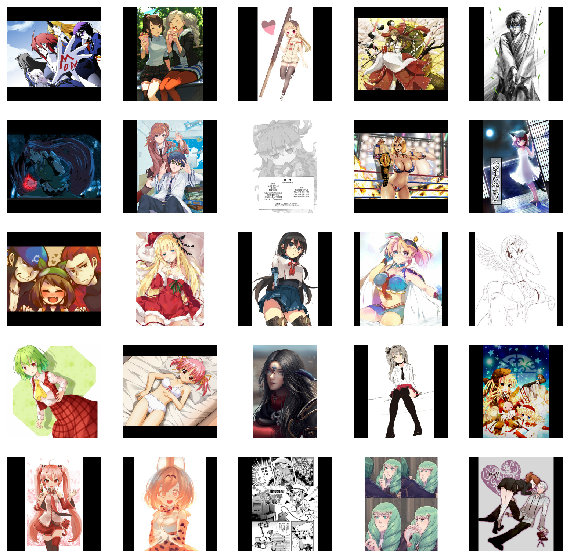

In [28]:
image_batch = next(iter(train_ds))
show_batch(image_batch)

In [31]:
image_batch.shape

TensorShape([32, 256, 256, 3])